## Pratima Nikam

# Task_1 
PERDICTION USING SUPERVISED MACHINE LEARNING

Predict the percentage of student based on the number of hours they studied. This is a simple linear regression task as its involves just two variables

In [1]:
## Importing all libraries required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataset
dataset = pd.read_excel('G://GRIP_Task//Task_1.xlsx')

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


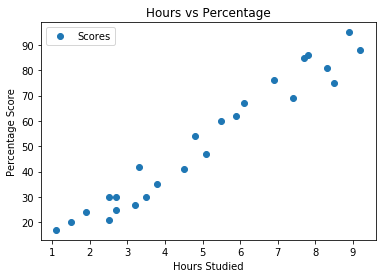

In [7]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
#From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


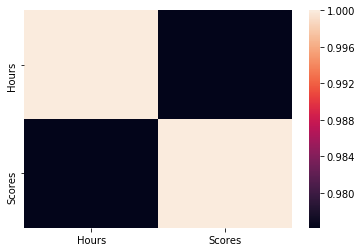

In [9]:
###corraltion matrix
dataset_corr= dataset.corr()['Hours'][:-1]
corr= dataset.drop('Hours',axis=1).corr
corr = dataset.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

# Model Building and Evaluation

In [10]:
#Preparing the Data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the ML Algorithm_Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


In [13]:
print(regressor.intercept_)     
print(regressor.coef_)

2.018160041434669
[9.91065648]


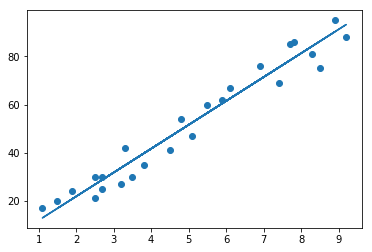

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
#Making Predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


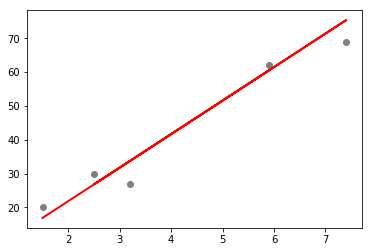

In [16]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413


In [19]:
hours=[[9.25]]
pred_=regressor.predict(hours)
print("Number of hours ={}".format(hours))
if pred_[0]>100:
    print("prediction score=100")
else:
    print("Predition Score ={}".format(pred_))

Number of hours =[[9.25]]
Predition Score =[93.69173249]


# support vecotor mahine

In [20]:
from sklearn.svm import SVR

In [23]:
regressor = SVR(kernel='rbf')
fitSVR = regressor .fit(X_train, y_train)
y_pred = fitSVR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,48.230836
1,27,45.741926
2,69,54.479445
3,30,45.985374
4,62,52.704467


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.35484480089725
Mean Squared Error: 340.20510474757015
Root Mean Squared Error: 18.44464975941723
